# ITK image grid: image's spatial metadata

In [1]:
# Install notebook dependencies
import sys

#!{sys.executable} -m pip install itk


In [2]:
# Import notebook dependencies
import os
import requests
import shutil

import itk
import matplotlib.pyplot as plt


In [3]:
# Retrieve hosted sample data from data.kitware.com
files_and_hashes = (
    (
        "data/DzZ_T1.mha",
        "039183ec990bb687e9e8f44ea3b1aebd8cd3444962d69e4e21c44975fb6e57801de12582cc723a8482108b6efd2214de3e9cb0d412bae0c80eafdcde95ae2bf4",
    ),
    (
        "data/mri3D_2.mha",
        "d2072454d9ba4af9ef7a310baf2b1b162c353cfc8f9425f6a928a150d4ba056e1d609c82fb752473a584fa40f7d89ed75dba2c94eeace72b0d85e5d5ced76dc1",
    ),
    (
        "data/brainweb165a10f17Rot10Tx15.mha",
        "61dc94a5213fce670178b38d92b70e45390db3838014a8e2aa5b3dab8c91aee45bffb5c291bb54a2a0eb292ae0754a2e9aa15fdd17c58fd28860e6e51504f17b",
    ),
    (
        "data/C0004255.mha",
        "fbc4c22e174df8039783728b7c84f6239c7bba0425b9c3f4c594aaefa0087423202d0616017a1314e4455b4c433077f40cfd1cd0f024aae5310eba45f8554718",
    ),
)

os.makedirs("data", exist_ok=True)

for idx in range(len(files_and_hashes)):
    if os.path.exists(files_and_hashes[idx][0]):
        print(f"{files_and_hashes[idx][0]} already exists.")
    else:
        download_url = f"https://data.kitware.com/api/v1/file/hashsum/sha512/{files_and_hashes[idx][1]}/download"
        print(f"Downloading {download_url} into {files_and_hashes[idx][0]}")
        response = requests.get(download_url, stream=True)
        with open(files_and_hashes[idx][0], "wb") as fp:
            response.raw.decode_content = True
            shutil.copyfileobj(response.raw, fp)


data/DzZ_T1.mha already exists.
data/mri3D_2.mha already exists.
data/brainweb165a10f17Rot10Tx15.mha already exists.
data/C0004255.mha already exists.


## Origin and spacing

![Origin and Spacing](images/origin_spacing.svg "Origin and Spacing")

Dimension: 3
Spacing: itkVectorD3 ([0.683594, 0.683594, 4.4])
Origin: itkPointD3 ([26.107, -141.741, 231.561])
Size: itkSize3 ([512, 512, 12])
Region index: itkIndex3 ([0, 0, 0])


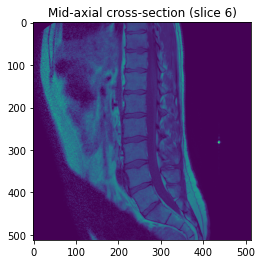

spacing: [4.40000107 0.68359373 0.68359424]
Dictionary use_count: 1
ITK_InputFilterName  [UNKNOWN_PRINT_CHARACTERISTICS]
ITK_original_direction  [UNKNOWN_PRINT_CHARACTERISTICS]
ITK_original_spacing  [UNKNOWN_PRINT_CHARACTERISTICS]



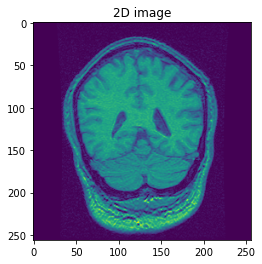

In [4]:
# Load image, show its basic metadata and plot a slice
image = itk.imread(files_and_hashes[0][0])
image2D = itk.imread(files_and_hashes[1][0])

print(f"Dimension: {image.GetImageDimension()}")
print(f"Spacing: {image.GetSpacing()}")
print(f"Origin: {image.GetOrigin()}")
size = image.GetLargestPossibleRegion().GetSize()
print(f"Size: {size}")
print(f"Region index: {image.GetLargestPossibleRegion().GetIndex()}")

z_slice = int(size[2] / 2)
# ITK uses [i, j, k] indexing convention, which normally corrsponds to (x, y, z)
# matplotlib uses numpy indexing convention [k, j, i], which is reverse from ITK
plt.imshow(image[z_slice, :, :], aspect="equal")
plt.title(f"Mid-axial cross-section (slice {z_slice})")
plt.show()

# Some image metadata can be accessed in dictionary-like fashion
# This form is in numpy-friendly KJI order
print(f"spacing: {image['spacing']}")

# We can also access general metadata, which is not necessarily related to spatial properties
print(image.GetMetaDataDictionary())  # Richness of  metadata depends on file format

# When dealing with 2D images, we can plot them directly
plt.imshow(image2D)
plt.title("2D image")
plt.show()


In [5]:
# Just using print gives us the most important metadata about the image
# along some less important internal class variables
print(image)


Image (0000020FBB61BE90)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 449
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 248
  UpdateMTime: 448
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 12]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 12]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 12]
  Spacing: [0.683594, 0.683594, 4.4]
  Origin: [26.107, -141.741, 231.561]
  Direction: 
0.00017793 0.00254092 -0.999997
0.990241 -0.139368 -0.00017793
-0.139368 -0.990237 -0.00254092

  IndexToPointMatrix: 
0.000121632 0.00173696 -4.39999
0.676923 -0.0952711 -0.000782892
-0.0952711 -0.67692 -0.01118

  PointToIndexMatrix: 
0.000260286 1.44858 -0.203875
0.003717 -0.203875 -1.44858
-0.227272 -4.0

## Pixel indices

![Image indices](images/indices.svg "Indices")

Index to physical coordinate conversion, ignoring orientation:
```
P[0] = Index[0] x Spacing[0] + Origin[0]
P[1] = Index[1] x Spacing[1] + Origin[1]
```

Physical to index coordinate conversion, ignoring orientation:
```
Index[0] = floor( ( P[0] - Origin[0] ) / Spacing[0] + 0.5 )
Index[1] = floor( ( P[1] - Origin[1] ) / Spacing[1] + 0.5 )
```

In [6]:
# Let's access some pixels!
index = itk.Index[3]()
index[0] = 4  # Fifth column
index[1] = 7  # Eighth row
index[2] = 0  # First slice

value = image.GetPixel(index)
p = image.TransformIndexToPhysicalPoint(index)
print(f"Voxel {index} has value: {value}")
print(f"Voxel {index} has spatial position: {p}")

# Let's try one more
index[0] = int(size[0] / 3)
index[1] = int(size[1] / 4)
index[2] = z_slice
value = image.GetPixel(index)
print(f"Voxel {index} has value: {value}")
p = image.TransformIndexToPhysicalPoint(index)
print(f"Voxel {index} has spatial position: {p}")


Voxel itkIndex3 ([4, 7, 0]) has value: 0
Voxel itkIndex3 ([4, 7, 0]) has spatial position: itkPointD3 ([26.1196, -139.7, 226.441])
Voxel itkIndex3 ([170, 128, 6]) has value: 352
Voxel itkIndex3 ([170, 128, 6]) has spatial position: itkPointD3 ([-0.0499128, -38.8635, 128.652])


## Regions

![Image region](images/region.svg "Region")

Extracting itkImageRegion3([170, 128, 6], [256, 256, 6])


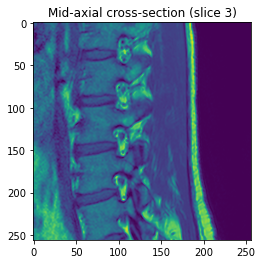

In [7]:
# Let's extract a sub-region
region = image.GetLargestPossibleRegion()
region.SetIndex(index)

subregion_size = itk.Size[image.GetImageDimension()]()
for d in range(image.GetImageDimension()):
    subregion_size[d] = int(size[d] / 2)
region.SetSize(subregion_size)
print(f"Extracting {region}")

sub_image = itk.region_of_interest_image_filter(image, region_of_interest=region)

subregion_z_slice = int(subregion_size[2] / 2)
plt.imshow(sub_image[subregion_z_slice, :, :], aspect="equal")
plt.title(f"Mid-axial cross-section (slice {subregion_z_slice})")
plt.show()


## Orientation via axes directions

![Image orientation](images/direction.svg "Direction")

In [8]:
# ITK uses the same coordinate system as DICOM
# If direction is an identity matrix:

# X axis goes from Right    to Left
# Y axis goes from Anterior to Posterior
# Z axis goes from Inferior to Superior

# This is called RAI in ITK and LPS in DICOM,
# based on the initial letters of origin (ITK)
# or positive direction of axes (DICOM).

# image3 has identity (orthogonal) orientation in ITK's coordinate system
image3 = itk.imread(files_and_hashes[2][0])
print(f"image3 orientation (axes vectors): {image3.GetDirection()}\n")

# image has non-identity orientation with permutations and inversions
print(f"image orientation (axes vectors): {image.GetDirection()}")


image3 orientation (axes vectors): itkMatrixD33 ([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

image orientation (axes vectors): itkMatrixD33 ([[0.0001779299369092507, 0.0025409210012914763, -0.9999967560295555], [0.9902406488785104, -0.1393680549202613, -0.00017792995659020848], [-0.13936795058263612, -0.9902373902192385, -0.002540919380088758]])


## Original and sub-sampling grid

![Original and sub-sampling grid](images/subsampling1.svg "Original and sub-sampling grid")

## Sub-sampling grid

![Sub-sampling grid](images/subsampling2.svg "Sub-sampling grid")

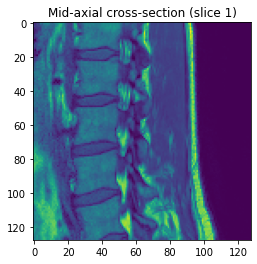

This image has the same physical extent as the one produced by sub-region.
But it has twice lower resolution (spacing twice bigger, half as many pixels).


In [9]:
# Let's down-sample an image.
# We will target the same sub-region as before

subsample_size = itk.Size[image.GetImageDimension()]()
spacing = image.GetSpacing()
subsample_spacing = type(spacing)()  # make a new variable of correct type
# subsample_spacing = itk.Vector[itk.D, image.GetImageDimension()]()
for d in range(image.GetImageDimension()):
    subsample_size[d] = int(size[d] / 4)
    subsample_spacing[d] = spacing[d] * 2

downsampled = itk.resample_image_filter(
    image,
    # identity transform by default
    # linear interpolator by default (nearest neighbor is for label images)
    size=subsample_size,
    output_spacing=subsample_spacing,
    output_origin=p,
    output_direction=image.GetDirection(),
)

subsample_z_slice = int(subsample_size[2] / 2)
plt.imshow(downsampled[subsample_z_slice, :, :], aspect="equal")
plt.title(f"Mid-axial cross-section (slice {subsample_z_slice})")
plt.show()

print("This image has the same physical extent as the one produced by sub-region.")
print("But it has twice lower resolution (spacing twice bigger, half as many pixels).")

## Coordinate System Conversions

![ITK Registration Transforms](images/registration_transforms.svg "Registration Transforms")

Images should be correlated via their physical coordinates. This is especially important for registration.

**Note:** the static content here was taken from [Registration: Spatial Image Definitions](https://docs.google.com/presentation/d/1Mo_yHmJ7Uai2DKAO2VTyAm56V9KdI-Wx5xVgc9gljmQ/edit).